## Oceanbolt Python SDK Lesson 4: Terminal-level exports 

This is the fourth lesson in our learning series for the Oceanbolt Python SDK.

In this example, we show how to find terminal level exports via the SDK. Specifically, we will use the SDK to find weekly exports from a range of Rio Tinto terminals.

You can find an article with more context around the methodologies on our blog: https://www.oceanbolt.com/blog

In [69]:
# Import the relevant libraries
# In order to get a timeseries of weekly export volumes, we use the TradeFlowTimeseries client (https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.trade_flows import TradeFlowTimeseries, TradeFlows
from oceanbolt.sdk.data.port_calls import PortCalls

from datetime import date

In [70]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("")

In [71]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: TradeFlows
trade_flow_client = TradeFlowTimeseries(base_client)
trade_flow_raw_client = TradeFlows(base_client)


In [72]:
# We apply filters to our query to get a timeseries of weekly exports from a range of Rio Tinto's export terminals.
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#arguments


##5962,Dampier Rio Tinto East Intercourse Island Iron Ore Berth
#5963,"Dampier Rio Tinto Parker Point Iron Ore (Berths #1, 2, 3 & 4)"
#7231,Dampier Rio Tinto East Intercourse Island lay-by berth
#7072,Sept-Iles IOC (Rio Tinto) Iron Ore Berth
#4851,Gladstone South Tree Wharf Rio Tinto Bauxite Berth
#7206,Gladstone Rio Tinto Yarwun Bauxite Berth
#5943,Weipa Rio Tinto Bauxite Terminal
#5944,Gove Rio Tinto Bauxite Berth
#5959,"Port Walcott Rio Tinto Cape Lambert B (Berth #1, 2, 3 & 4)"
#5958,"Port Walcott Rio Tinto Cape Lambert A (Berth #1, 2, 3 & 4)"


df = trade_flow_client.get(
    frequency="weekly",
    load_berth_id = [5962,5963,7231,7072,4851,7206,5943,5944,5959,5958], #The Oceanbolt Berth ID as discovered by using https://app.oceanbolt.com/
    start_date=date(2020, 1, 1),
    end_date=date.today(),
    group_by="commodity",
    exclude_intra_country = True
)
df = df.pivot("date","group","value")
df = df.reset_index()

In [73]:
df

group,date,Alumina,Bauxite,Iron Ore (Unclassified),Iron Ore Fines,Iron Ore Pellets,Sand,Unknown
0,2019-12-30,0,440800,3946900,0,176400,0,0
1,2020-01-06,0,349200,4805500,0,527600,0,0
2,2020-01-13,0,525700,4926800,0,341400,0,0
3,2020-01-20,0,644900,7624400,56700,257700,0,0
4,2020-01-27,0,396100,7305600,0,347100,0,0
...,...,...,...,...,...,...,...,...
107,2022-01-17,0,551500,5049100,0,579300,0,0
108,2022-01-24,0,404500,5243400,0,422500,0,0
109,2022-01-31,0,506800,5740600,0,246000,0,0
110,2022-02-07,0,590400,4785300,0,0,0,0


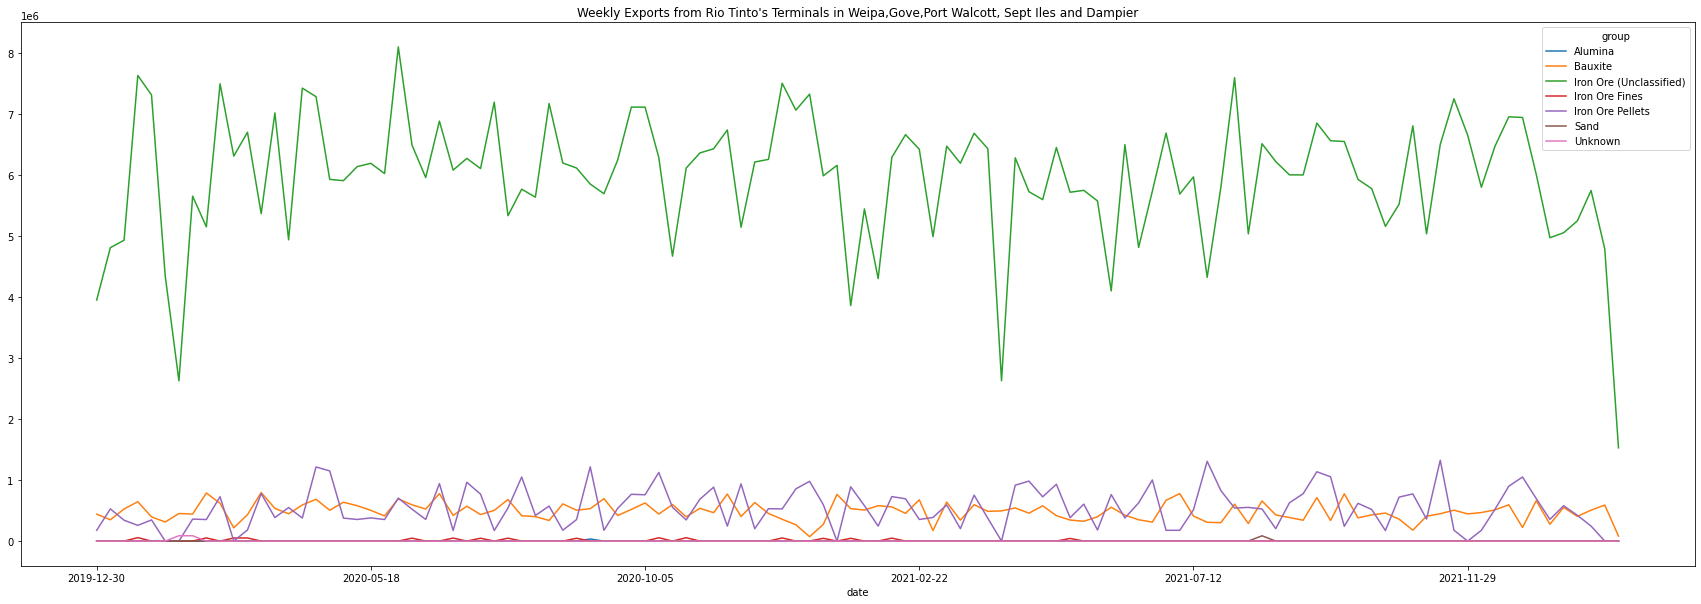

In [74]:
#Let's plot the timeseries
df.plot.line(x='date',figsize=(30,10), title='Weekly Exports from Rio Tinto\'s Terminals in Weipa,Gove,Port Walcott, Sept Iles and Dampier');

Lets look at the data grouped by port:

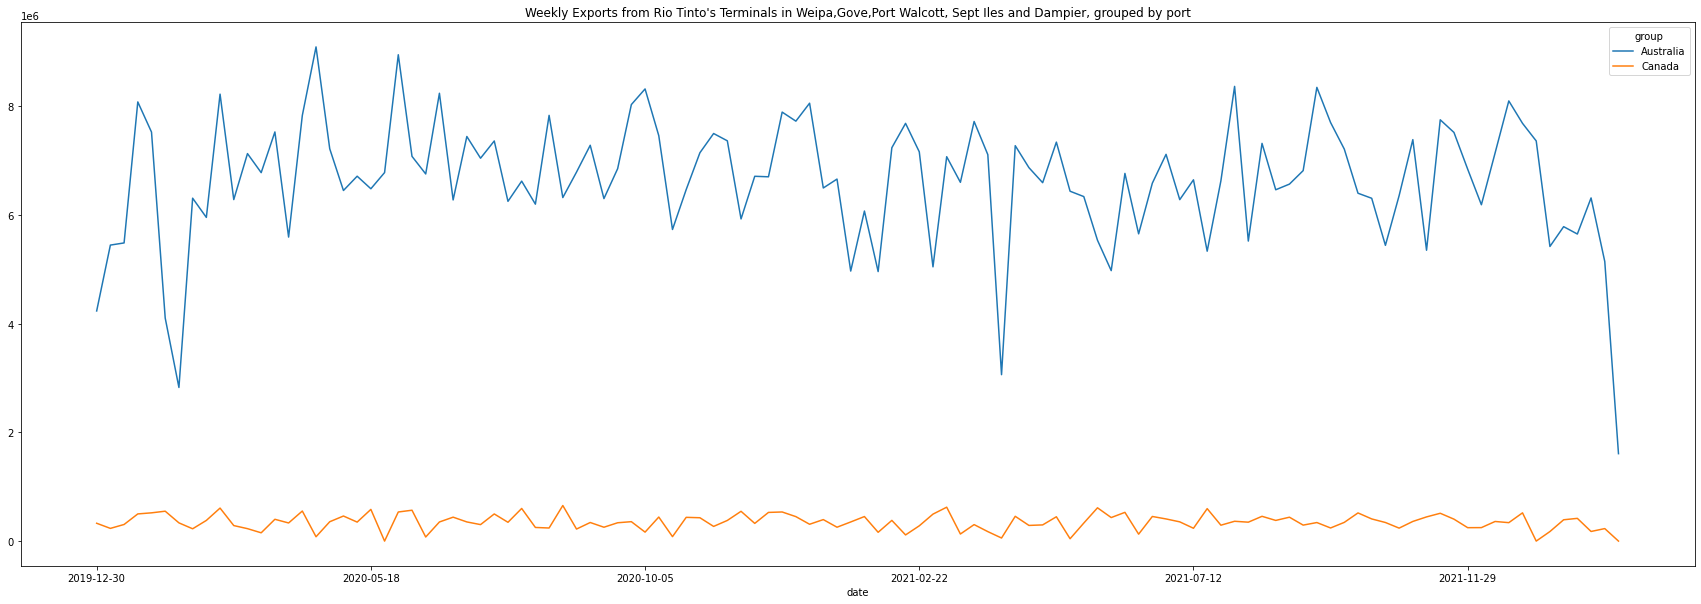

In [75]:
# We apply filters to our query to get a timeseries of weekly exports from a range of Rio Tinto's terminals
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#arguments


##5962,Dampier Rio Tinto East Intercourse Island Iron Ore Berth
#5963,"Dampier Rio Tinto Parker Point Iron Ore (Berths #1, 2, 3 & 4)"
#7231,Dampier Rio Tinto East Intercourse Island lay-by berth
#7072,Sept-Iles IOC (Rio Tinto) Iron Ore Berth
#4851,Gladstone South Tree Wharf Rio Tinto Bauxite Berth
#7206,Gladstone Rio Tinto Yarwun Bauxite Berth
#5943,Weipa Rio Tinto Bauxite Terminal
#5944,Gove Rio Tinto Bauxite Berth
#5959,"Port Walcott Rio Tinto Cape Lambert B (Berth #1, 2, 3 & 4)"
#5958,"Port Walcott Rio Tinto Cape Lambert A (Berth #1, 2, 3 & 4)"


df = trade_flow_client.get(
    frequency="weekly",
    load_berth_id = [5962,5963,7231,7072,4851,7206,5943,5944,5959,5958], #The Oceanbolt Berth ID as discovered by using https://app.oceanbolt.com/
    start_date=date(2020, 1, 1),
    end_date=date.today(),
    group_by="load_country",
    exclude_intra_country = True
)
df = df.pivot("date","group","value")
df = df.reset_index()
#Let's plot the timeseries
df.plot.line(x='date',figsize=(30,10), title='Weekly Exports from Rio Tinto\'s Terminals in Weipa,Gove,Port Walcott, Sept Iles and Dampier, grouped by port');

In [76]:
# We apply filters to our query to get a timeseries of weekly exports from a range of Rio Tinto's terminals
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#arguments


##5962,Dampier Rio Tinto East Intercourse Island Iron Ore Berth
#5963,"Dampier Rio Tinto Parker Point Iron Ore (Berths #1, 2, 3 & 4)"
#7231,Dampier Rio Tinto East Intercourse Island lay-by berth
#7072,Sept-Iles IOC (Rio Tinto) Iron Ore Berth
#4851,Gladstone South Tree Wharf Rio Tinto Bauxite Berth
#7206,Gladstone Rio Tinto Yarwun Bauxite Berth
#5943,Weipa Rio Tinto Bauxite Terminal
#5944,Gove Rio Tinto Bauxite Berth
#5959,"Port Walcott Rio Tinto Cape Lambert B (Berth #1, 2, 3 & 4)"
#5958,"Port Walcott Rio Tinto Cape Lambert A (Berth #1, 2, 3 & 4)"


df = trade_flow_raw_client.get(
    frequency="weekly",
    load_berth_id = [5962,5963,7231,7072,4851,7206,5943,5944,5959,5958], #The Oceanbolt Berth ID as discovered by using https://app.oceanbolt.com/
    start_date=date(2020, 1, 1),
    end_date=date.today(),
    group_by="load_country",
    exclude_intra_country = True
)
df = df.drop(columns=["voyage_id","flow_id","sub_segment","commodity_value","commodity",'load_port_id',"load_port_unlocode",'load_country'])
df.head(50)

,imo,vessel_name,segment,dwt,commodity_group,volume,load_port_name,load_berth_id,load_berth_name,load_country_code,...,destination,status,parceling,ballast_started_at,ballast_port_name,ballast_port_id,ballast_port_unlocode,ballast_country,ballast_country_code,ballast_region
0,9689689,MARIA D,Capesize,179232,Iron Ore,175600,Port Walcott,5959,Port Walcott Rio Tinto Cape Lambert B (Berth #...,AU,...,QINGDAO,Transit,False,2022-01-29T10:54:26Z,Liuheng,400,CNLHE,China,CN,FAREAST
1,9595424,SHAGANG HAILI,Capesize,207725,Iron Ore,203500,Port Walcott,5959,Port Walcott Rio Tinto Cape Lambert B (Berth #...,AU,...,AU PWL JP OIT,Transit,False,2022-01-29T06:59:29Z,Wakayama,1581,JPWAK,Japan,JP,FAREAST
2,9343558,LIBRA PACIFIC,Panamax,91486,Bauxite,89600,Weipa,5943,Weipa Rio Tinto Bauxite Terminal,AU,...,QINGDAO,Transit,False,2022-01-29T05:59:55Z,Dongjiakou,368,CNDJK,China,CN,FAREAST
3,9290268,CHIN SHAN,Capesize,175569,Iron Ore,172000,Port Walcott,5959,Port Walcott Rio Tinto Cape Lambert B (Berth #...,AU,...,FANGCHENG CN,Transit,False,2022-01-27T16:47:17Z,Dalian,359,CNDAL,China,CN,FAREAST
4,9725445,FEDERAL TOKORO,Supramax,55543,Iron Ore,54400,Sept-Iles,7072,Sept-Iles IOC (Rio Tinto) Iron Ore Berth,CA,...,DZDJE,Transit,False,2022-02-08T11:50:35Z,Sept-Iles,297,CASEI,Canada,CA,USEC
5,9494527,RMC ALTAIR,Capesize,250759,Iron Ore,245700,Port Walcott,5959,Port Walcott Rio Tinto Cape Lambert B (Berth #...,AU,...,TIANJIN,Transit,False,2022-01-28T08:49:52Z,Qingdao,432,CNQDG,China,CN,FAREAST
6,9374167,AURIGA OCEAN,Panamax,93549,Bauxite,81800,Weipa,5943,Weipa Rio Tinto Bauxite Terminal,AU,...,QING DAO,Transit,False,2022-01-28T18:57:27Z,Qingdao,432,CNQDG,China,CN,FAREAST
7,9482706,HEBEI SHIJIAZHUANG,Panamax,93721,Bauxite,81000,Weipa,5943,Weipa Rio Tinto Bauxite Terminal,AU,...,LONGKOU,Transit,False,2022-01-25T07:58:13Z,Laizhou,410,CNLZO,China,CN,FAREAST
8,9300582,CAPE HAWK,Capesize,176996,Iron Ore,173400,Dampier,5963,Dampier Rio Tinto Parker Point Iron Ore (Berth...,AU,...,QINGDAO,Transit,False,2021-12-18T03:54:50Z,Lanshan,405,CNLSN,China,CN,FAREAST
9,9721671,TOPEKA,Capesize,179549,Iron Ore,175900,Dampier,5963,Dampier Rio Tinto Parker Point Iron Ore (Berth...,AU,...,CN QDG,Transit,False,2022-01-26T06:50:12Z,Caofeidian,349,CNCFD,China,CN,FAREAST
